<a href="https://colab.research.google.com/github/DoCaoDuy/BaitapAI/blob/main/Adaptive_Food_Suggestion_Engine_by_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


8.999999999999998


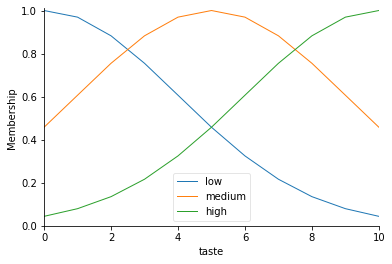

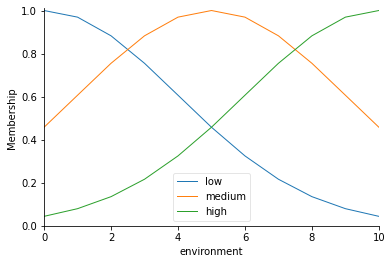

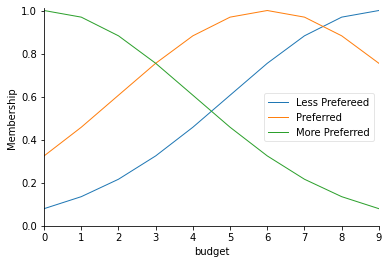

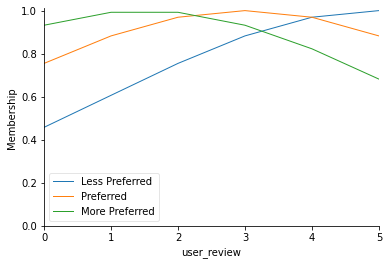

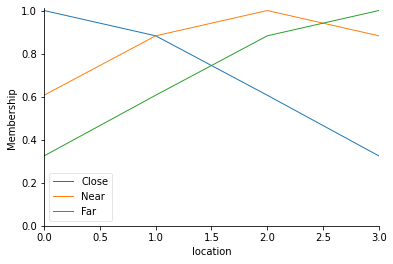

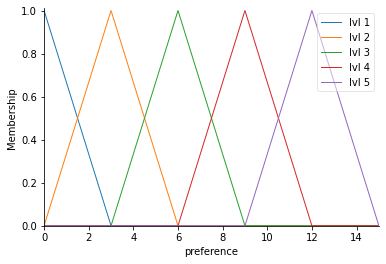

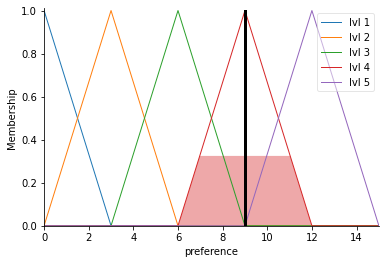

In [5]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np

taste = ctrl.Antecedent(np.arange(0,11,1),'taste')
environment = ctrl.Antecedent(np.arange(0,11,1),'environment')
budget = ctrl.Antecedent(np.arange(0,10,1),'budget')
location = ctrl.Antecedent(np.arange(0,4,1),'location')
user_review = ctrl.Antecedent(np.arange(0,6,1),'user_review')
preference = ctrl.Consequent(np.arange(0,16,1),'preference')

taste['low'] = fuzz.gaussmf(taste.universe,0,4)
taste['medium'] = fuzz.gaussmf(taste.universe,5,4)
taste['high'] = fuzz.gaussmf(taste.universe,10,4)

environment['low'] = fuzz.gaussmf(environment.universe,0,4)
environment['medium'] = fuzz.gaussmf(environment.universe,5,4)
environment['high'] = fuzz.gaussmf(environment.universe,10,4)

budget['Less Prefereed'] = fuzz.gaussmf(budget.universe,9,4)
budget['Preferred'] = fuzz.gaussmf(budget.universe,6,4)
budget['More Preferred'] = fuzz.gaussmf(budget.universe,0,4)

user_review['Less Preferred'] = fuzz.gaussmf(user_review.universe,5,4)
user_review['Preferred'] = fuzz.gaussmf(user_review.universe,3,4)
user_review['More Preferred'] = fuzz.gaussmf(user_review.universe,1.5,4)

location['Close'] = fuzz.gaussmf(location.universe,0,2)
location['Near'] = fuzz.gaussmf(location.universe,2,2)
location['Far'] = fuzz.gaussmf(location.universe,3,2)

preference['lvl 1'] = fuzz.trimf(preference.universe,[0,0,3])
preference['lvl 2'] = fuzz.trimf(preference.universe,[0,3,6])
preference['lvl 3'] = fuzz.trimf(preference.universe,[3,6,9])
preference['lvl 4'] = fuzz.trimf(preference.universe,[6,9,12])
preference['lvl 5'] = fuzz.trimf(preference.universe,[9,12,15])

taste.view()
environment.view()
budget.view()
user_review.view()
location.view()
preference.view()

rule1 = ctrl.Rule(taste['medium']&environment['low']&budget['More Preferred']&location['Close']&user_review['Less Preferred'],preference['lvl 4'])

preference_ctrl= ctrl.ControlSystem([rule1])
preferencing = ctrl.ControlSystemSimulation(preference_ctrl)

preferencing.input['taste']=1
preferencing.input['environment']=2
preferencing.input['budget']=2
preferencing.input['location']=3
preferencing.input['user_review']=1
preferencing.compute()
print(preferencing.output['preference'])
preference.view(sim=preferencing)